In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
path = r"J:\Datasets\Fish dataset\Fish_Dataset"
# folders = os.listdir(path)
# folders

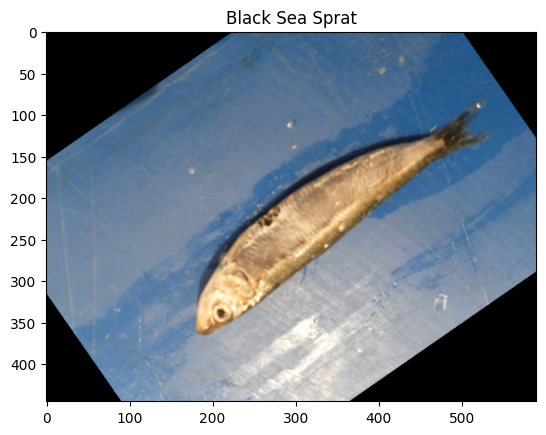

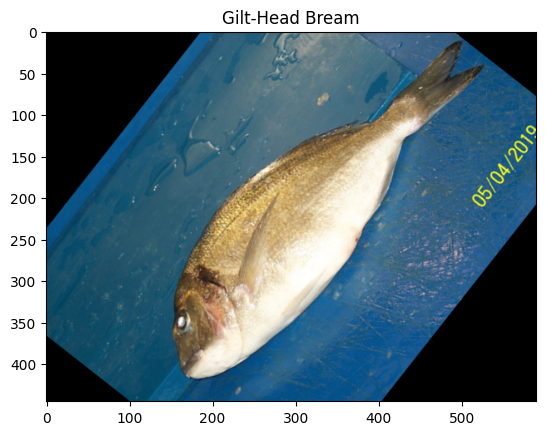

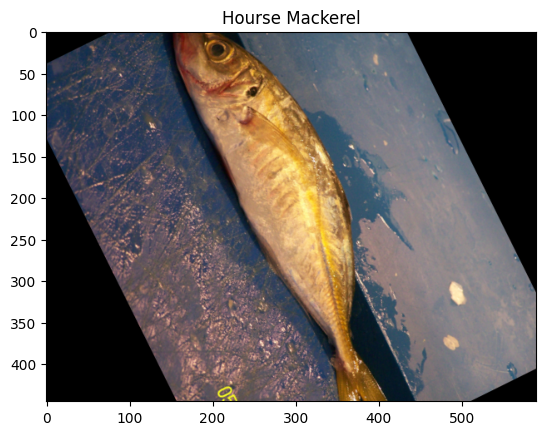

In [4]:
for i in folders[:3]:
    for paths in os.listdir(os.path.join(path,i))[:1]:
        plt.imshow(plt.imread(os.path.join(path,i,paths)))
        plt.title(i)
        plt.show()

In [4]:
data = tf.keras.utils.image_dataset_from_directory(path)

Found 9000 files belonging to 9 classes.


In [4]:
tf.keras.utils.image_dataset_from_directory

<function keras.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [88]:
import cv2
for img, lab in data.take(1):
    # plt.imshow(img[0]/255.0)
    cv2.imshow('1',np.array(img[0]/255))
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [39]:
data_iterator = data.as_numpy_iterator()
print(data.class_names)


['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']


In [95]:
a=data_iterator.next()

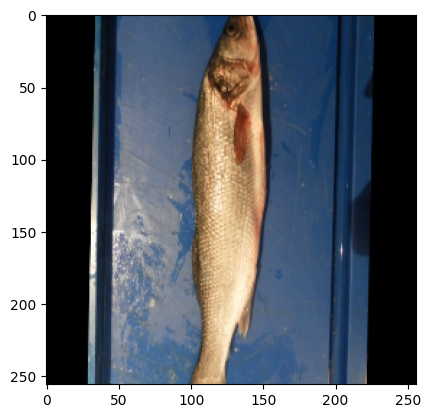

In [99]:
plt.imshow(a[0][0].astype('int64'))

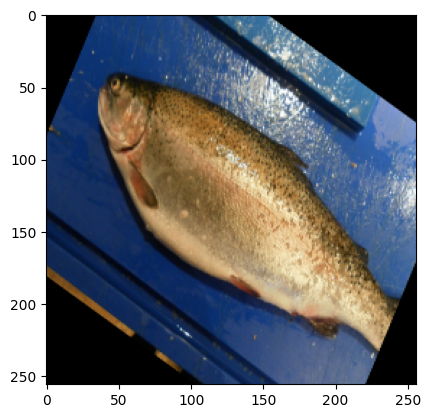

In [51]:
plt.imshow(data_iterator.next()[0][0] / 255.0)

In [5]:
data = data.map(lambda x,y: (x/255,y))

In [8]:
len(data)

282

In [6]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [7]:
train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test_data = data.skip(train_size+val_size).take(test_size)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=1, padding="same",activation="relu", input_shape=(256,256,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),

    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(9,activation="softmax")
])

In [12]:
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [13]:
model.fit(data,epochs=15,validation_data=val_data)

Epoch 1/15
282/282 [==============================] - 57s 196ms/step - loss: 2.3121 - accuracy: 0.2828 - val_loss: 2.9453 - val_accuracy: 0.3354
Epoch 2/15
282/282 [==============================] - 59s 206ms/step - loss: 1.6783 - accuracy: 0.3843 - val_loss: 1.3336 - val_accuracy: 0.5536
Epoch 3/15
282/282 [==============================] - 59s 207ms/step - loss: 1.4631 - accuracy: 0.4494 - val_loss: 1.9427 - val_accuracy: 0.4581
Epoch 4/15
282/282 [==============================] - 49s 172ms/step - loss: 1.4202 - accuracy: 0.4636 - val_loss: 1.5998 - val_accuracy: 0.5636
Epoch 5/15
282/282 [==============================] - 45s 159ms/step - loss: 1.2545 - accuracy: 0.5199 - val_loss: 1.0097 - val_accuracy: 0.6842
Epoch 6/15
282/282 [==============================] - 45s 159ms/step - loss: 1.1650 - accuracy: 0.5630 - val_loss: 1.0303 - val_accuracy: 0.6451
Epoch 7/15
282/282 [==============================] - 53s 189ms/step - loss: 1.0311 - accuracy: 0.6162 - val_loss: 0.6338 - val_ac

In [14]:
model.evaluate(test_data)

29/29 [==============================] - 8s 32ms/step - loss: 0.5133 - accuracy: 0.8584


[0.5133125185966492, 0.8584070801734924]

In [15]:
model.save("fish_model.h5")